In [1]:
import sys
sys.path.append('..')

In [2]:
from src.models.pipeline import pipeline
import glob
import json
import os
import pandas as pd
import ast
from datetime import datetime

37
(37, 37)


<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 2 Axes>

C:\Users\yaniv\Anaconda3\lib\site-packages\sklearn\cluster\spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


label 0 has done already cannot evaluate unsequentional segmentation, try other parameters


In [3]:
groundbase_dir = '../data/raw/groundbase'
transcripts_dir = os.path.join(groundbase_dir,'transcripts')
topic_dataset_path = os.path.join(groundbase_dir,'dataset.csv')
transcript_filespath = glob.glob(groundbase_dir + '/transcripts/*.json')

In [4]:
'''Read the transcript'''
transcripts_jsons = {}
for fl in transcript_filespath:
    with open(fl,encoding="utf8") as f:
        transcript =ast.literal_eval(f.read()) #json.load(f)
        vid = fl.split('\\')[-1].split('.')[0]
        #print(vid)
        transcripts_jsons[vid] = transcript
#print(transcripts_jsons)

In [5]:
'''Read the videos metadata to perform on them the segmentation'''
df_videos = pd.read_csv(topic_dataset_path)

In [6]:
''' Transfer topic shifts time to seconds units instead HH:MM:SS'''

def topic_shifts_seconds(topic_shifts):
    tp_shift_sec=[]
    for tp in topic_shifts:
        intervals = tp.split(':')
        seconds = int(intervals[2])
        minutes = int(intervals[1]) * 60
        hours = int(intervals[0]) * 60 *60
        tp_shift_sec.append(seconds + minutes + hours)
    return tp_shift_sec


for video_id in transcripts_jsons.keys():    
    df_videos.at[df_videos['video id'] == video_id,'topic shifts(ends)'] =\
    topic_shifts_seconds(\
                         df_videos[df_videos['video id'] == \
                                   video_id]['topic shifts(ends)'])


In [7]:
#df_videos

In [8]:
'''
    Preparing the experiment parameters csv
'''

# if you want to use existing file - specify it. else, replace it with None
experiment_date = '13-04-2020 23-26-41.csv'
exp_file = '../models/{}'.format(experiment_date)

if exp_file is None:
    mycolumns = ['video_id','window_size','step_size','vector_method','similarity_method','is_min_thresh',\
                'algorithm','n_clusters','sim_thresh','sim_filter','accurrcy_shift']
    df_exp = pd.DataFrame(columns=mycolumns)
    df_exp['video_id'] = transcripts_jsons.keys()
    date_now = datetime.now().strftime("%d-%m-%Y %H-%M-%S")
    experiment_date = '{}.csv'.format(date_now)
    exp_file = "../models/{}".format(experiment_date)
    #print(experiment_date)
    df_experiment = df_exp.to_csv(exp_file)

# Now go to the latest experiment file and add you parameters. Afterwords you can continue with running the notebook.

# To run the experiment, click from here run below all

In [9]:
df_exp = pd.read_csv(exp_file,index_col=0)
df_results = pd.DataFrame()

'''Last cleaning'''
df_exp = df_exp.replace({pd.np.nan: None})
df_videos = df_videos.replace({pd.np.nan:None})

In [10]:
df_exp

,video_id,window_size,step_size,vector_method,similarity_method,is_min_thresh,algorithm,n_clusters,sim_thresh,sim_filter,accurrcy_shift
0,2mC1uqwEmWQ,120,50,tfidf,cosine,True,spectral_clustering,14,0.4,None,15
1,MkiUBJcgdUY,70,50,tfidf,cosine,True,spectral_clustering,5,0.4,"['median',(2,2)]",15
2,x5zLaWT5KPs,40,20,tfidf,cosine,True,spectral_clustering,13,0.4,None,15
3,zWg7U0OEAoE,150,40,tf,cosine,True,spectral_clustering,12,0.4,"['median',(5,5)]",15
4,zWg7U0OEAoE,150,40,do_nothing,wmdistance,False,spectral_clustering,12,5.0,None,15


In [11]:
'''Configure result directory'''

# random a number to not override existing files
import random
extention = random.randint(0,1000)

result_name = experiment_date.split('.')[0] + "_" + str(extention)
results_path = '../data/processed/{}'.format(result_name)
os.mkdir(results_path)
results_file_path = os.path.join(results_path,'data.csv')

running the 0 experiment


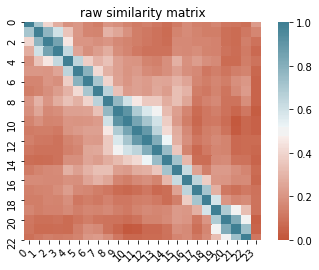

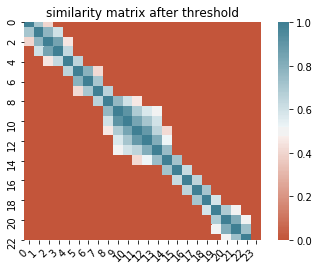

C:\Users\yaniv\Anaconda3\lib\site-packages\sklearn\cluster\spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


TP: 4 , FP: 11, FN: 9
precision rate : 0.26666666666666666, recall rate : 0.3076923076923077 
running the 1 experiment


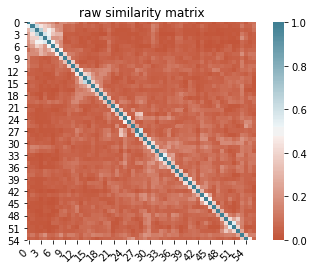

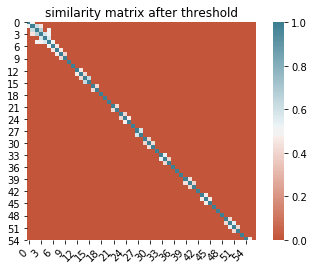

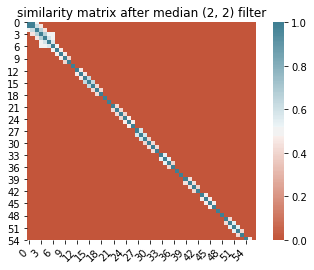

C:\Users\yaniv\Anaconda3\lib\site-packages\sklearn\cluster\spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


label 0 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 2 experiment


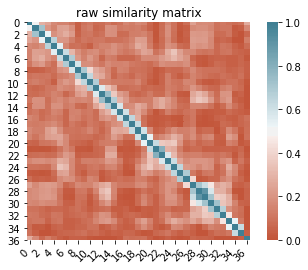

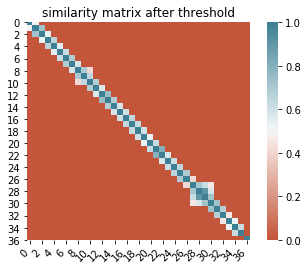

C:\Users\yaniv\Anaconda3\lib\site-packages\sklearn\cluster\spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


TP: 4 , FP: 10, FN: 8
precision rate : 0.2857142857142857, recall rate : 0.3333333333333333 
running the 3 experiment


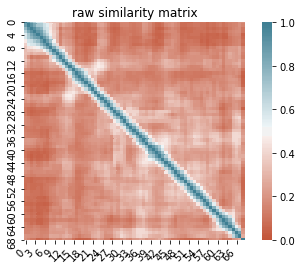

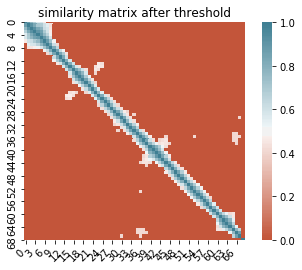

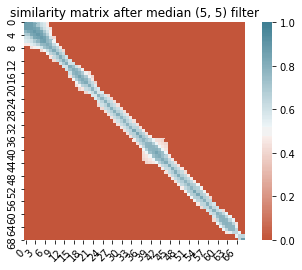

C:\Users\yaniv\Anaconda3\lib\site-packages\sklearn\cluster\spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


TP: 0 , FP: 13, FN: 12
precision rate : 0.0, recall rate : 0.0 
running the 4 experiment
69
(69, 69)


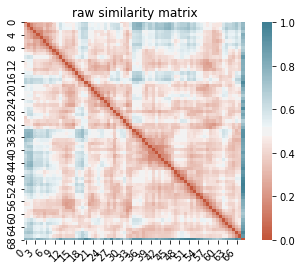

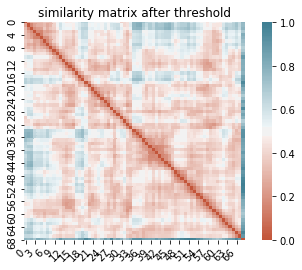

C:\Users\yaniv\Anaconda3\lib\site-packages\sklearn\cluster\spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


label 2 has done already cannot evaluate unsequentional segmentation, try other parameters


In [12]:
'''running the pipeline for each of the '''

for index,exp in df_exp.iterrows():
    #ground_base = df_videos.loc[df_videos['video id'] == exp['video_id'],'topic shifts(ends)'].values.tolist()[:-1]
    vid = exp['video_id']
    video_metadata = df_videos.loc[df_videos['video id'] == vid]
    # getting the topic shifts except the end of the video which is clearly at the length time 
    ground_base = video_metadata['topic shifts(ends)'].values.tolist()[:-1]
    video_len = video_metadata['length'].values.tolist()[0]
    curr_transcripts = transcripts_jsons[vid]    
    
    sim_filter = exp['sim_filter']
    if sim_filter is not None:
        sim_filter = ast.literal_eval(sim_filter)
        
    figure_path = os.path.join(results_path,str(index))
    os.mkdir(figure_path)
    
    print("running the %s experiment" %  (index))
    
    df_results = pipeline.run(df_results,ground_base,vid,video_len,curr_transcripts,\
                              figure_path = figure_path,\
                             window_size = exp['window_size'], step_size = exp['step_size'],\
                             vector_method=exp['vector_method'],similarity_method= exp['similarity_method'],\
                             is_min_thresh=exp['is_min_thresh'],algorithm=exp['algorithm'],\
                             n_clusters=exp['n_clusters'],sim_thresh=exp['sim_thresh'],\
                             sim_filter=sim_filter,accurrcy_shift=exp['accurrcy_shift'])

In [13]:
df_results[['VIDEO','METHOD','ISFAILED',\
            'PRECISION','RECALL',\
            'TP','FP','FN','BLOCKSIZE','STEPSIZE',\
            'NUMOFCLUSTERSFORSC','NUMTOPICS','THERSHOLD',\
            'FILTER','VIDEOLENGTH','ACCURECYSECONDS','FAILUREMESSAGE']]

,VIDEO,METHOD,ISFAILED,PRECISION,RECALL,TP,FP,FN,BLOCKSIZE,STEPSIZE,NUMOFCLUSTERSFORSC,NUMTOPICS,THERSHOLD,FILTER,VIDEOLENGTH,ACCURECYSECONDS,FAILUREMESSAGE
0,2mC1uqwEmWQ,chunking_tfidf_cosine_threshold_spectral_clust...,0.0,0.266667,0.307692,4.0,11.0,9.0,120.0,50.0,14.0,15.0,0.4,None,00:27:50,15.0,None
1,MkiUBJcgdUY,chunking_tfidf_cosine_threshold_filter_spectra...,1.0,0.000000,0.000000,0.0,0.0,0.0,70.0,50.0,5.0,18.0,0.4,"['median', (2, 2)]",01:05:06,15.0,label 0 has done already cannot evaluate unseq...
2,x5zLaWT5KPs,chunking_tfidf_cosine_threshold_spectral_clust...,0.0,0.285714,0.333333,4.0,10.0,8.0,40.0,20.0,13.0,14.0,0.4,None,00:17:37,15.0,None
3,zWg7U0OEAoE,chunking_tf_cosine_threshold_filter_spectral_c...,0.0,0.000000,0.000000,0.0,13.0,12.0,150.0,40.0,12.0,13.0,0.4,"['median', (5, 5)]",00:53:30,15.0,None
4,zWg7U0OEAoE,chunking_do_nothing_wmdistance_threshold_spect...,1.0,0.000000,0.000000,0.0,0.0,0.0,150.0,40.0,12.0,13.0,5.0,None,00:53:30,15.0,label 2 has done already cannot evaluate unseq...


In [14]:
'''Save the results into file'''
df_results.to_csv(results_file_path,columns=['VIDEO','METHOD','ISFAILED',\
                                                      'PRECISION','RECALL',\
                                                     'TP','FP','FN','BLOCKSIZE','STEPSIZE',\
                                                      'NUMOFCLUSTERSFORSC','NUMTOPICS','THERSHOLD',\
                                                      'FILTER','VIDEOLENGTH','ACCURECYSECONDS','FAILUREMESSAGE'])